# Kaggle Challenge
This is a Kaggle challenge in which we will try to predict the potential donors for a charity organization. The goal is to identify participants who are most likely to donate to the charity so as to target them better.

There are ariund 45000 rows that contain information about the people like their occupation, race, country of origin, age, education etc and the goal is to indentify people who have an income of more than $50,000 as they generally are more likely to donate money.

### Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\srini\Downloads\census.csv\census.csv')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
# exploring the education numeric column
df['education-num'].value_counts().head()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
Name: education-num, dtype: int64

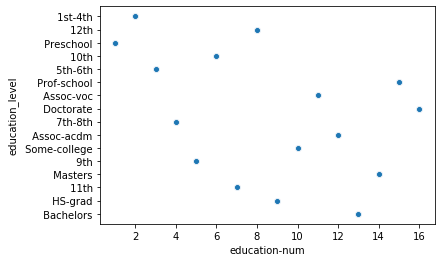

In [5]:
# exploring the relationship between Education numeric and level columns
sns.scatterplot(df['education-num'], df.education_level);

So the education level and the education num are directly related in the dataset.

In [6]:
# Checking for the missing values
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

So there are no missing values in the data

In [7]:
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [8]:
#hot encoding the income column to 1 and 0.
df.income.replace({'<=50K':0,'>50K':1}, inplace= True)

In [9]:
df.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0


In [10]:
# Checking for duplicates in the data
df.duplicated().sum()

5982

There are 5982 duplicate rows in the dataset. However, it could also be that 2 people hvae the same features as the features are quite generic.

In [11]:
df.occupation.value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

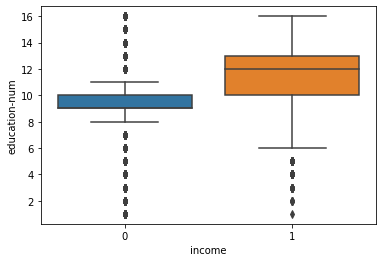

In [12]:
# relationship between the number of years of education and income level
sns.boxplot(df.income, df['education-num'])

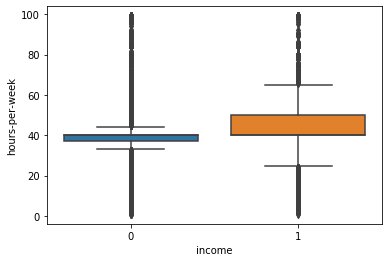

In [13]:
# relationship between the hours per week and income level
sns.boxplot(df.income, df['hours-per-week']);

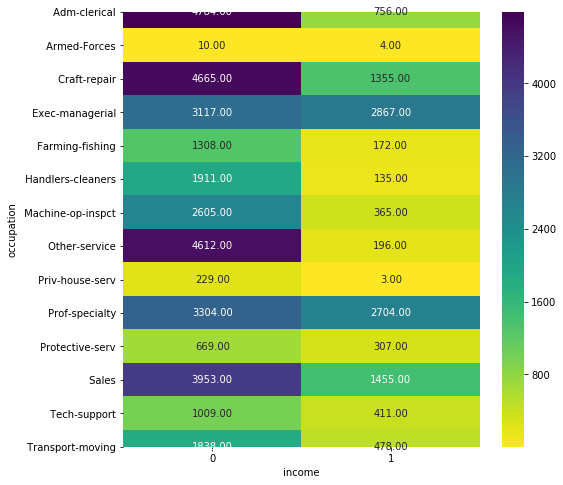

In [14]:
# Relationship between the occupation and the income level
df_occupation= df.pivot_table(columns='income', index= 'occupation', aggfunc='count')['age']
plt.figure(figsize=[8,8])
sns.heatmap(df_occupation,cmap= 'viridis_r',annot= True, fmt= '.2f' );

The above heatmap shows that most of the higher income people are either Executive managers, professional specialists or Sales professionals.

In [15]:
df['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

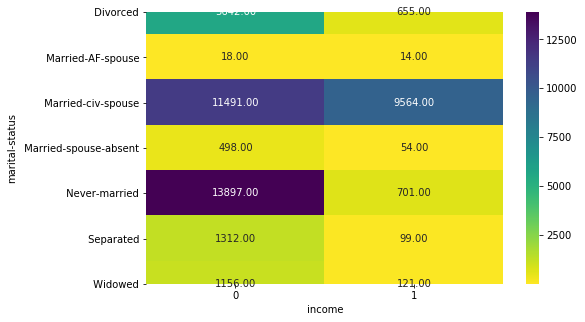

In [16]:
# Relationship between Marital status and the income level
df_marriage= df.pivot_table(columns='income', index= 'marital-status', aggfunc='count')['age']
plt.figure(figsize=[8,5])
sns.heatmap(df_marriage,cmap= 'viridis_r',annot= True, fmt= '.2f' );

Most of the higher income people are Married-civ-spouse. Overwhelming number of never married people are in the lower income bracket

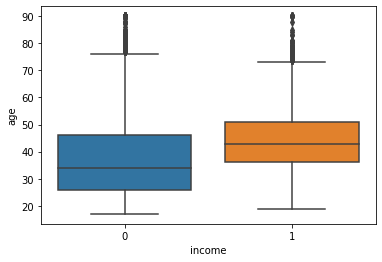

In [17]:
# Relationship between the age of people and their income
sns.boxplot(df.income, df.age);

It seems older people tend to have higher incomes with the median age of richer people being around 45 years and the poorer people being 35 years

In [18]:
df.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0


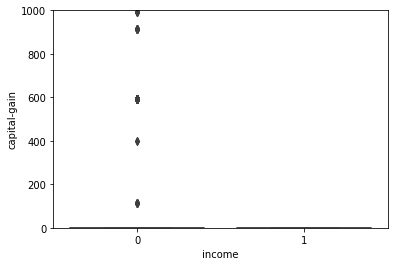

In [19]:
# Relationship between the Capital-gain and their income
sns.boxplot(df.income, df['capital-gain'], )
plt.ylim([0,1000]);

There seems to be very high number of points that are close to 0 for the capital gains. We will plot a histogram to see them

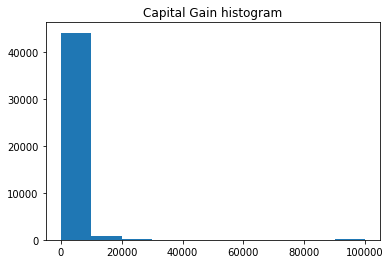

In [20]:
plt.hist(df['capital-gain'])
plt.title('Capital Gain histogram');

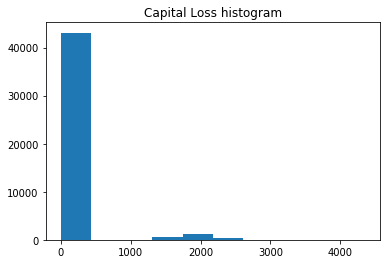

In [21]:
plt.hist(df['capital-loss'])
plt.title('Capital Loss histogram');


They both seem to be having logarithmic relationship with the values

### Data Preprocessing
The Capital Gain and Capital loss columns see to have logarithmic relationship and need to to be transformed.

In [22]:
# Chaning both capital gains and capital losses to their logarithmic forms and adding 1 to prevent log(0) from creating
# problems

df['capital-gain']= np.log(df['capital-gain']+1)

df['capital-loss']= np.log(df['capital-loss']+1)

In [23]:
df.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,0


In [24]:
# Standard Scaling all the numerical columns
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

numerical = ['age','education-num','capital-gain', 'capital-loss','hours-per-week']
df[numerical]= scale.fit_transform(df[numerical])

In [25]:
df.columns.difference(numerical)

Index(['education_level', 'income', 'marital-status', 'native-country',
       'occupation', 'race', 'relationship', 'sex', 'workclass'],
      dtype='object')

In [26]:
# Undertaking a one hot encoding for the Categorical variables in the 
categorical= ['education_level','marital-status','native-country','occupation','race', 'relationship','sex','workclass']
df_categorical= pd.get_dummies(df[categorical])
df_categorical.shape

df_numerical= df[numerical]

#combining the numerical and the categorical dataframes together
df_new= df_categorical.join(df_numerical, )
df_new.head(1)

,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,...,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,age,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0.034201,1.128753,2.815336,-0.222752,-0.07812


In [28]:
# Sending the manipulated and cleaned data to a local csv file
df_new.to_csv(r'C:\Users\srini\Downloads\intro-to-ml-tensorflow-master\intro-to-ml-tensorflow-master\projects\p1_charityml\df_new.csv',\
             index= False)

In [31]:
df['income'].to_csv(r'C:\Users\srini\Downloads\intro-to-ml-tensorflow-master\intro-to-ml-tensorflow-master\projects\p1_charityml\df_y.csv',\
             header= True,index= False)

### Predicting the response

In [28]:
# Splitting the data into training and validation sets

from sklearn.model_selection import train_test_split
y= df['income']
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size= 0.30, random_state= 42,stratify= y)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [33]:
import time

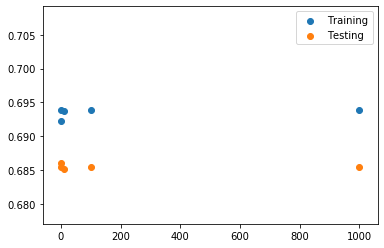

1.9530956745147705 s


In [34]:
# Using Logistic Regression to train the training dataset
C_param= [0.1,1,10,100,1000] # C_param is the hyperparameter
f_test_list= []
f_train_list= []
start= time.time()

for c in C_param:
    model= LogisticRegression(solver= 'liblinear',C= c)
    model.fit(X_train, y_train)

    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    
    f_train=fbeta_score(y_train, prediction_train,beta=0.5 )
    f_test= fbeta_score(y_test, prediction_test,beta=0.5 )
     
    f_train_list.append(f_train)
    f_test_list.append(f_test)

# Plotting AUC vs C parameter
plt.scatter(x=C_param, y= f_train_list, label= 'Training')
plt.scatter(x=C_param, y= f_test_list, label='Testing')
plt.legend()
plt.show()
end= time.time()
print(end-start,'s')

In [36]:
from sklearn.preprocessing import PolynomialFeatures 
from time import time

In [ ]:
# exploring the non-linear relationship between the predictors by transforming data to 2 degree polynomial
poly = PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(df_new)

In [ ]:
# Splitting the data into training and validation sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size= 0.3, random_state= 35,stratify= y)

In [ ]:
X_poly.shape

In [ ]:
# Using Logistic Regression on polynomial features to train the training dataset
C_param= [0.05,0.1,0.3]
f_test_list= []
f_train_list= []
start= time()
for c in C_param:
    model= LogisticRegression(solver= 'liblinear',C= c)
    model.fit(X_train_poly, y_train)

    prediction_train=model.predict(X_train_poly)
    prediction_test=model.predict(X_test_poly)
    
    f_train=fbeta_score(y_train, prediction_train,beta=0.5 )
    f_test= fbeta_score(y_test, prediction_test,beta=0.5 )
     
    f_train_list.append(f_train)
    f_test_list.append(f_test)

# Plotting AUC vs C parameter
plt.scatter(x=C_param, y= f_train_list, label= 'Training')
plt.scatter(x=C_param, y= f_test_list, label='Testing')
plt.legend()
plt.show()
end= time()
print(end-start,'s')


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(df_new)

model= LogisticRegression(solver= 'liblinear',C= 0.1)
model.fit(X_poly, y)
prediction_train=model.predict(X_poly)
fbeta_score(y, prediction_train,beta=0.5 )

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size= 0.30, random_state= 35,stratify= y)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Using Naive Bayes to predict

model = GaussianNB()
model.fit(X_train_poly, y_train)

prediction_train=model.predict(X_train_poly)
prediction_test=model.predict(X_test_poly)

fbeta_score(y_train, prediction_train,beta=0.5 )

In [ ]:
from sklearn.svm import SVC

In [ ]:
# # Using SVM to train the model with RBF kernel

# C_param= [0.1,1,10,100]
# auc_test= []
# auc_train= []
# start= time()
  
# start= time()
# model = SVC(kernel = 'poly',gamma = 'scale',C= 0.1,  )
# model.fit(X_train, y_train)

# prediction_train=model.predict(X_train)
# prediction_test=model.predict(X_test)

# fpr1, tpr1, threshold1= roc_curve(y_train, prediction_train, )
# fpr2, tpr2, threshold2= roc_curve(y_test, prediction_test, )

# auc_train.append(auc(fpr1,tpr1))
# auc_test.append(auc(fpr2,tpr2))


# # Plotting AUC vs C parameter
# # plt.scatter(x=C_param, y= auc_train, label= 'Training')
# # plt.scatter(x=C_param, y= auc_test, label='Testing')
# # plt.legend()
# # plt.show()
# end= time()
# print(end-start,'in s')
# print(auc_train, auc_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [39]:
model= DecisionTreeClassifier(min_samples_leaf=1)

model.fit(X_train, y_train)

prediction_train=model.predict(X_train)
prediction_test=model.predict(X_test)

f_train=fbeta_score(y_train, prediction_train,beta=0.5 )
f_test= fbeta_score(y_test, prediction_test,beta=0.5 )

print(f_train, f_test)

0.9665748690534046 0.6363803006232432


In [54]:
# Random Forest Classifier
K= [1,2,3,4,5]
esti = [2,3,4,5]
f_train_list=[]
f_test_list=[]

for k in K:
    for e in esti:
        model= RandomForestClassifier(n_estimators=150,criterion= 'entropy', max_depth=50, min_samples_leaf=k,\
                                      min_samples_split= e  )

        model.fit(X_train, y_train)

        prediction_train=model.predict(X_train)
        prediction_test=model.predict(X_test)

        f_train=fbeta_score(y_train, prediction_train,beta=1)
        f_test= fbeta_score(y_test, prediction_test,beta=1 )

        f_train_list.append(f_train)
        f_test_list.append(f_test)
        print(k,e,f_train, f_test)


1 2 0.9465153970826579 0.6649770315222556
1 3 0.9309533150255002 0.6698610445615716
1 4 0.9056203605514316 0.6718271246573133
1 5 0.8846076660646197 0.6798839458413927
2 2 0.7597116259536641 0.6892710892710893
2 3 0.7608771806908149 0.6838198911429986
2 4 0.7593253551683112 0.6894051738342395
2 5 0.7553901257110753 0.6869952200428548
3 2 0.7248797056326067 0.6870983687592686
3 3 0.7269762495568948 0.6871794871794873
3 4 0.7255109979489355 0.6865177832919769
3 5 0.7250849377123443 0.6874484578591458
4 2 0.7110953058321479 0.6869723555702699
4 3 0.7133476088508209 0.6859133897461424
4 4 0.7095711933567185 0.6832360300250208
4 5 0.709433423719138 0.6844119114955913
5 2 0.7021656779358159 0.6804605372935091
5 3 0.7033752860411899 0.6834556370913943
5 4 0.7031082529474814 0.6814395201599467
5 5 0.7035663338088445 0.6826506826506826


In [100]:
# Seeing the relative importance of different features in the dataset
imp =pd.DataFrame({'Feature':X_train.columns, 'Importance':model.feature_importances_})
imp['Columns']= imp['Feature'].apply(lambda x: x.split('_')[0])
imp.groupby(by='Columns', ).sum().sort_values(by='Importance', ascending= False)

,Feature,Importance,Columns
0,education_level_ 10th,0.002103,education
1,education_level_ 11th,0.002585,education
2,education_level_ 12th,0.000945,education
3,education_level_ 1st-4th,0.000350,education
4,education_level_ 5th-6th,0.001060,education


In [122]:
# Undertaking a one hot encoding for the Categorical variables in the 
categorical= ['marital-status','occupation', 'relationship','workclass']
df_categorical2= pd.get_dummies(df[categorical])

df_numerical= df[numerical]

#combining the numerical and the categorical dataframes together
df_new_drop= df_categorical2.join(df_numerical, )
df_new_drop.head(1)

,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,age,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0.034201,1.128753,2.815336,-0.222752,-0.07812


In [123]:
X_train, X_test, y_train, y_test = train_test_split(df_new_drop, y, test_size= 0.30, random_state= 42,stratify= y)

In [124]:
# Random Forest Classifier that generalized best was with hyperparameter with n_estimators=130 and max_depth =40
model= RandomForestClassifier(n_estimators=130,criterion= 'entropy', max_depth=40   )

model.fit(X_train, y_train)

prediction_train=model.predict(X_train)
prediction_test=model.predict(X_test)

fpr1, tpr1, threshold1= roc_curve(y_train, prediction_train, )
fpr2, tpr2, threshold2= roc_curve(y_test, prediction_test, )

auc_train=auc(fpr1,tpr1)
auc_test =auc(fpr2,tpr2)
print(k,e,auc_train, auc_test)

40 130 0.9504171088959981 0.7645806913070863


In [125]:
# Finding the relative importance betweent he predictors
imp =pd.DataFrame({'Feature':X_train.columns, 'Importance':model.feature_importances_})
imp['Columns']= imp['Feature'].apply(lambda x: x.split('_')[0])
imp.groupby(by='Columns', ).sum().sort_values(by='Importance', ascending= False)

,Importance
Columns,
age,0.252589
education-num,0.126917
marital-status,0.126204
hours-per-week,0.123447
capital-gain,0.111172
relationship,0.094602
occupation,0.086414
workclass,0.040680
capital-loss,0.037975


In [29]:
# importing the testing data

test = pd.read_csv(r'C:\Users\srini\Downloads\intro-to-ml-tensorflow-master\intro-to-ml-tensorflow-master\projects\p1_charityml\test_census.csv')#,\
#dtype= {'age': float, 'education-num': float,'capital-gain': float,'capital-loss': float,'hours-per-week': float,'income': int})
test.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
Unnamed: 0         45222 non-null int64
age                45205 non-null float64
workclass          45200 non-null object
education_level    45202 non-null object
education-num      45208 non-null float64
marital-status     45201 non-null object
occupation         45200 non-null object
relationship       45206 non-null object
race               45203 non-null object
sex                45203 non-null object
capital-gain       45207 non-null float64
capital-loss       45205 non-null float64
hours-per-week     45209 non-null float64
native-country     45206 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


In [31]:
# Data manipulation on the test data
test.columns

test.rename(columns={'Unnamed: 0':'id'}, inplace=True)

test.head(1)

,id,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States


In [32]:
# Changing to log values
test['capital-loss']= np.log(test['capital-loss']+1)
test['capital-gain']= np.log(test['capital-gain']+1)

In [33]:
#Scaling all the numerical columns
scale= StandardScaler()

numerical = ['age','education-num','capital-gain', 'capital-loss','hours-per-week']
test[numerical]= scale.fit_transform(test[numerical])

In [34]:
test[['capital-gain', 'capital-loss',]].median(axis=0)

capital-gain   -0.300342
capital-loss   -0.222741
dtype: float64

In [35]:
test.fillna(value={'capital-gain':-0.300342,'capital-loss':-0.222741}, inplace= True)
test.isna().sum()

id                  0
age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain        0
capital-loss        0
hours-per-week     13
native-country     16
dtype: int64

In [36]:
test_numerical= test[numerical]
test_numerical.fillna(test_numerical.mean(),inplace= True )

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [37]:
test_numerical.isna().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [38]:
categorical= ['education_level','marital-status','native-country','occupation','race', 'relationship','sex','workclass']
test_cat = test[categorical]
test_cat.isna().sum()

education_level    20
marital-status     21
native-country     16
occupation         22
race               19
relationship       16
sex                19
workclass          22
dtype: int64

In [39]:
values = {'education_level':'HS-grad', 'marital-status': 'Married-civ-spouse', 'native-country':'United-States',\
          'occupation':'Craft-repair', 'race':'White', 'relationship':'Husband', 'sex':'Male', 'workclass':'Private'}
test_cat.fillna(values, inplace= True)
test_cat.isna().sum()

education_level    0
marital-status     0
native-country     0
occupation         0
race               0
relationship       0
sex                0
workclass          0
dtype: int64

In [40]:
# Undertaking a one hot encoding for the Categorical variables in the 

test_categorical= pd.get_dummies(test[categorical])
print(test_categorical.shape)

#combining the numerical and the categorical dataframes together
test_new= test_categorical.join(test_numerical, )
test_new.head(1)

(45222, 98)


,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,...,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,age,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-1.327686,-1.613345,-0.300342,-0.222741,-0.078231


In [41]:
test_new.to_csv(r'C:\Users\srini\Downloads\intro-to-ml-tensorflow-master\intro-to-ml-tensorflow-master\projects\p1_charityml\test_new.csv',\
               index= False)

In [92]:
# Predicting the response for the test data
model= RandomForestClassifier(n_estimators=150,criterion= 'entropy', max_depth=50, min_samples_leaf=1,\
                             min_samples_split=2)
model.fit(df_new,y)
test_predict= model.predict(test_new)

train_pred = model.predict(df_new)
fbeta_score(y,train_pred, beta=0.5)

0.9483803437637728

In [310]:
# poly = PolynomialFeatures(degree=2)
# X_poly= poly.fit_transform(df_new)

# model= LogisticRegression(solver= 'liblinear',C= 0.1)
# model.fit(X_poly, y)
# prediction_train=model.predict(X_poly)
# print(fbeta_score(y, prediction_train,beta=0.5 ))

# test_poly= poly.fit_transform(test_new)
# test_predict= model.predict(test_poly)

0.7359500446030329


In [94]:
test['income']=test_predict
test.head(1)
test.income.sum()

10806

In [95]:
submission = test[['id', 'income']]
submission.shape

(45222, 2)

In [96]:
submission.to_csv(r'C:\Users\srini\Downloads\submission28_4_1.csv', index= False)